###**Wildan Abrori Aziz**
###**22.11.5186**

https://colab.research.google.com/drive/12RqbDU1kXyW4ajwQpHXnHzkUnh6c8hCW?usp=sharing

In [ ]:
!pip install numpy pandas scikit-learn xgboost lightgbm matplotlib seaborn
!pip install scikit-learn==1.2.2
!pip install xgboost==2.1.3

In [ ]:
#Import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_absolute_error
from sklearn.base import RegressorMixin
from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Dataset
data = pd.read_csv('/content/drive/MyDrive/BIg data/heart.csv')
print(data.head())

# Lihat beberapa baris pertama
print(data.head())

# Analisis data
print(data.info())
print(data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161   

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#Normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Ganti dengan fitur numerik Anda
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
#Encoding fitur kategorikal
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False untuk output array
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Ganti dengan fitur kategorikal Anda
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_df], axis=1)

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('target', axis=1)
y = data['thalach']

# Tampilkan beberapa baris dari X dan y
print(X.head())
print(y.head())

        age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  \
0  0.479167  0.292453  0.196347  0.740458  0.161290    0.0    1.0   1.0   0.0   
1  0.500000  0.433962  0.175799  0.641221  0.500000    0.0    1.0   1.0   0.0   
2  0.854167  0.481132  0.109589  0.412214  0.419355    0.0    1.0   1.0   0.0   
3  0.666667  0.509434  0.175799  0.687023  0.000000    0.0    1.0   1.0   0.0   
4  0.687500  0.415094  0.383562  0.267176  0.306452    1.0    0.0   1.0   0.0   

   cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  \
0   0.0  ...      1.0   0.0   0.0   1.0   0.0   0.0     0.0     0.0     0.0   
1   0.0  ...      0.0   1.0   0.0   0.0   0.0   0.0     0.0     0.0     0.0   
2   0.0  ...      0.0   1.0   0.0   0.0   0.0   0.0     0.0     0.0     0.0   
3   0.0  ...      1.0   0.0   1.0   0.0   0.0   0.0     0.0     0.0     0.0   
4   0.0  ...      0.0   0.0   0.0   0.0   1.0   0.0     0.0     0.0     1.0   

   thal_3  
0     1.0  
1     1.0  
2 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Korelasi
correlation_matrix = data.corr()

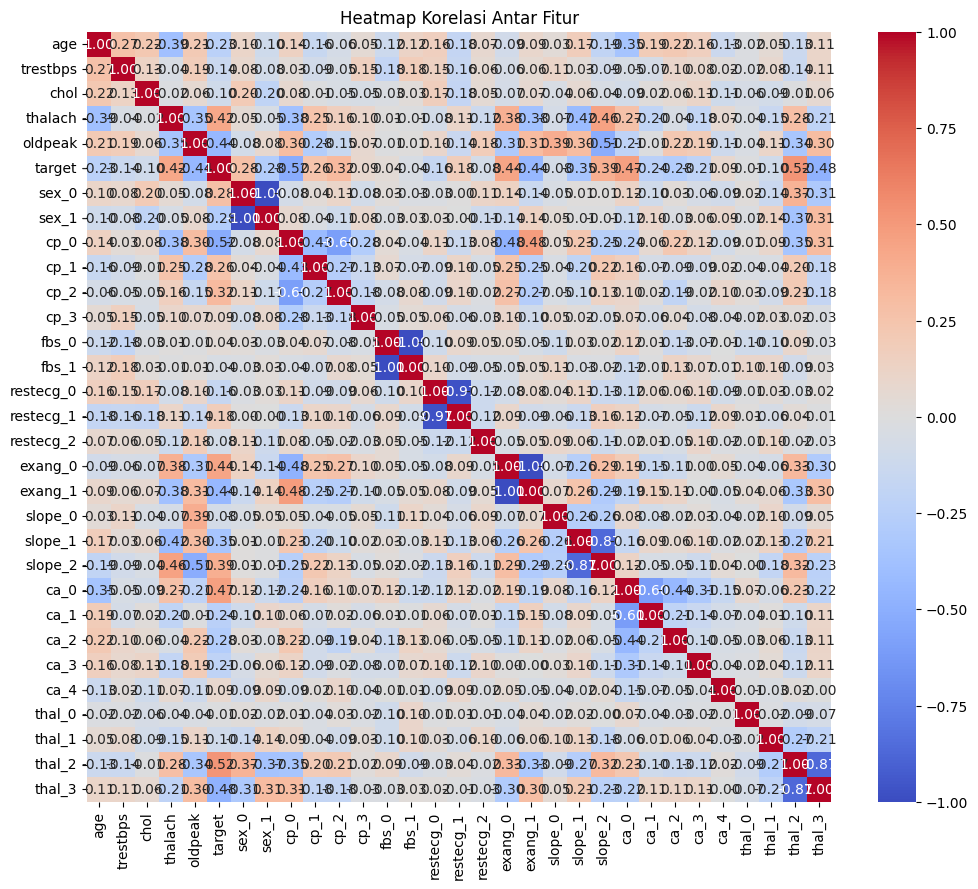

In [ ]:
#Heatmap
plt.figure(figsize=(12, 10))  # Atur ukuran figure jika diperlukan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

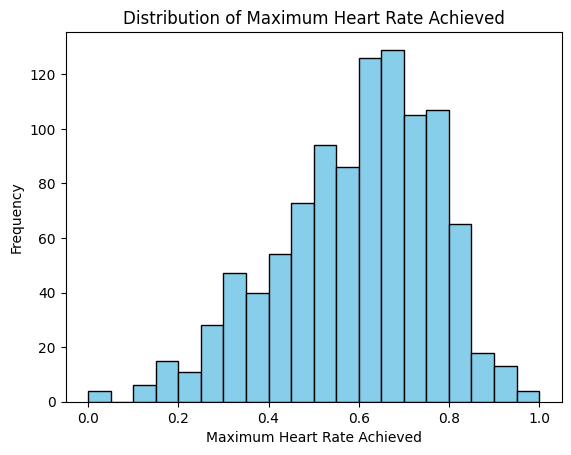

In [ ]:
# Histogram
plt.hist(data['thalach'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.show()


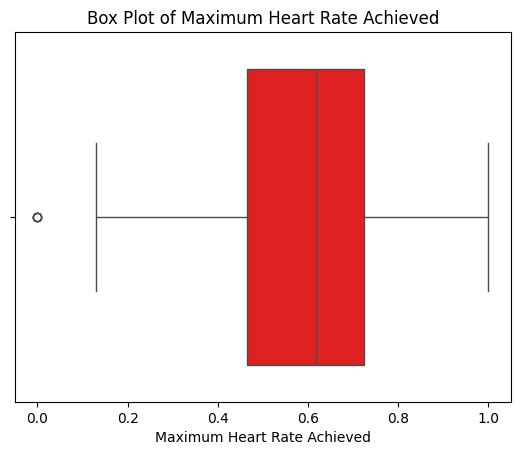

In [ ]:
# Box plot untuk kolom 'thalach'
sns.boxplot(x=data['thalach'], color='red')
plt.xlabel('Maximum Heart Rate Achieved')
plt.title('Box Plot of Maximum Heart Rate Achieved')
plt.show()

In [ ]:
# XGBoost Regressor
model = XGBRegressor(random_state=42)

In [ ]:
# Latih model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 6.38970910610276e-07
Root Mean Squared Error: 0.000799356560372326
R-squared: 0.9999797858389845
Mean Absolute Error: 0.00039364507631359816
